In [ ]:
#import necessary libraries

import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

from sklearn.linear_model import LogisticRegression 

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score 

In [ ]:
#import dataset
data = pd.read_csv(r"/content/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking for null values
data.EstimatedSalary= pd.to_numeric(data.EstimatedSalary, errors='coerce')
data.isnull().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["RowNumber"] = le.fit_transform(data["RowNumber"])
data["CustomerId"] = le.fit_transform(data["CustomerId"])
data["Surname"] = le.fit_transform(data["Surname"])
data["CreditScore"] = le.fit_transform(data["CreditScore"]) 
data["Geography"] = le.fit_transform(data["Geography"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Age"] = le.fit_transform(data["Age"])
data["Tenure"] = le.fit_transform(data["Tenure"])
data["Balance"] = le.fit_transform(data["Balance"]) 
data["NumOfProducts"] = le.fit_transform(data["NumOfProducts"])
data["HasCrCard"] = le.fit_transform(data["HasCrCard"])
data["IsActiveMember"]  = le.fit_transform(data["IsActiveMember"]) 
data["EstimatedSalary"] = le.fit_transform(data["EstimatedSalary"])
data["Exited"]  = le.fit_transform(data["Exited"]) 


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [ ]:
x= np.data.iloc[:,0:19].values
y= np.data.iloc[:,19:20].values

AttributeError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,13:14]).toarray()
j= one.fit_transform(x[:,12:14]).toarray()
x=np.delete(x,[4,5,6,7,8,9,10,11,12,13], axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

In [ ]:
data.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,1507.774200,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200,0.203700
std,2886.89568,2886.89568,846.204311,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,773.750000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000,0.000000
50%,4999.50000,4999.50000,1542.000000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000,0.000000
75%,7499.25000,7499.25000,2238.250000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000,0.000000
max,9999.00000,9999.00000,2931.000000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000,1.000000


<ipython-input-169-fec8894554d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Tenure"])
<ipython-input-169-fec8894554d1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

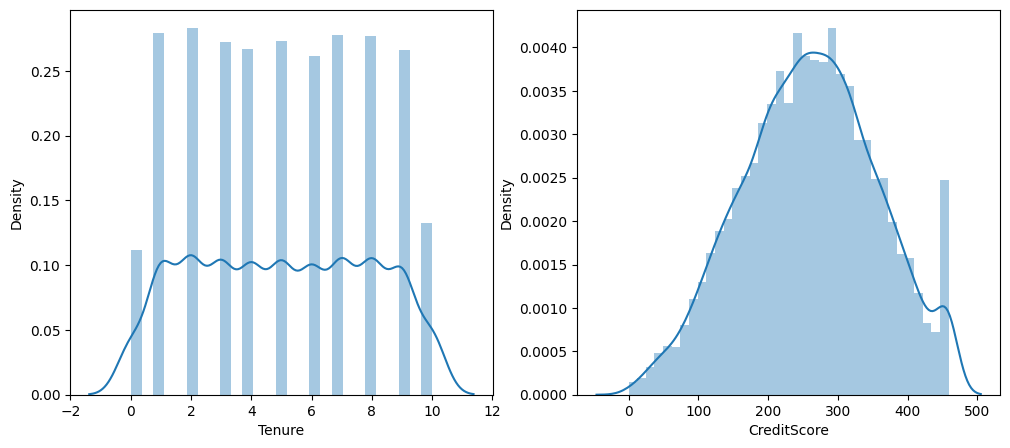

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["Tenure"])
plt.subplot(1,2,2)
sns.distplot(data["CreditScore"])

<Axes: ylabel='count'>

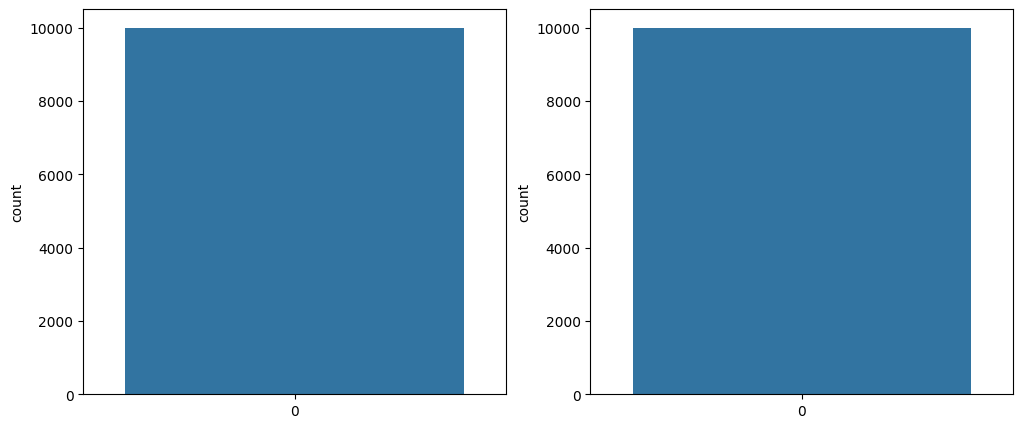

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["Gender"])
plt.subplot(1,2,2)
sns.countplot(data["CreditScore"])

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

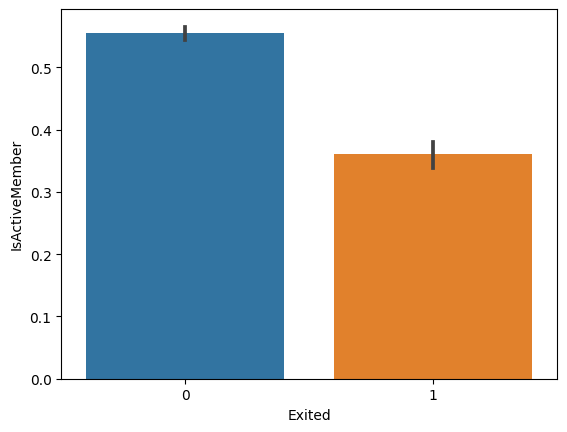

In [ ]:
sns.barplot(x="Exited",y="IsActiveMember",data=data)

<Axes: >

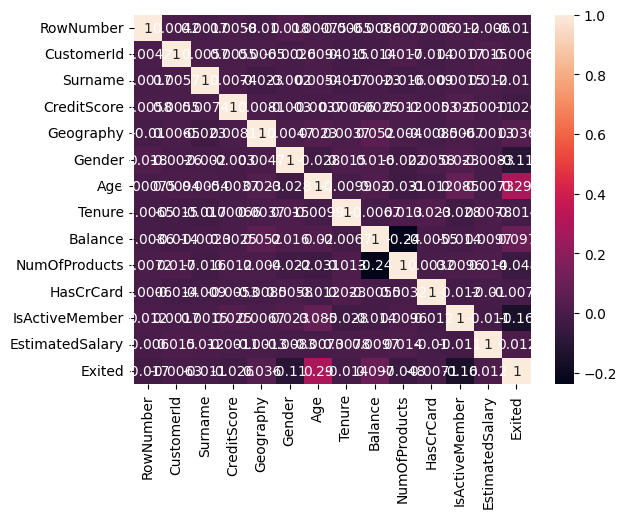

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#importing and building the Decision tree model
def logreg(x_train,x_test,y_train,y_test):
  lr = LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr = lr.predict(x_train)
  print(accuracy_score(y_lr_tr,y_train))
  ypred_lr = lr.predict(x_test)
  print(accuracy_score(yPred_lr,y_test))
  print("***Logistic Regression***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_lr))
  print("Classification Report")
  print(classification_report(y_test,yPred_1r)) 

In [ ]:
#printing the train accuracy and test accuracy respectively
logreg(x-train,x-test,y-train,y-test)

In [ ]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
  dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr = dtc.predict(x_train)
  print(accuracy_score (y_dt_tr,y_train))
  yPred_dt = dtc.predict(x_test)
  print(accuracy_score(yPred_dt,y_test))
  print("***Decision Tree***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_dt))
  print("Classification Report")
  print(classification_report(y_test,yPred_dt))

In [ ]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

In [ ]:
#importing and building the random forest model
def RandomForest(x_tarin,x_test,y_train,y_test):
  rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr = rf.predict(x_train)
  print(accuracy_score (y_rf_tr,y_train))
  yPred_rf = rf.predict(x_test)
  print(accuracy_score(yPred_rf,y_test))
  print("***Random Forest***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_rf))
  print("Classification Report")
  print(classification_report(y_test,yPred_rf))

In [ ]:
#printing the train acuracy and test accuracy respectively
Rondomforest(x_train,x_test,y_train,y_test)

In [ ]:
#importing and building the KNN model
def KNN(x_train,x_test,y_train,y_test):
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  y_knn_tr = knn.predict(x_train)
  print(accuracy_score(y_knn_tr,y_train))
  yPred_knn = knn.predict(x_test)
  print(accuracy_score(yPred_knn,y_test))
  print("***KNN***")
  print("Confusion_Matrix")
  print("Confusion_Matrix")
  print("Classification Report")
  print(classification_report(y_test,yPred_knn))

In [ ]:
#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

In [ ]:
#importing and building the random forest model
def svm(x_tarin,x_test,y_train,y_test):
  svm = SVC (kernel = "linear")
  svm.fit(x_train,y_train)
  y_svm_tr = svm.predict(x_train)
  print(accuracy_score(y_svm_tr,y_train))
  yPred_svm = svm.predict(x_test)
  print(accuracy_score (yPred_svm,y_test))
  print("***Support Vector Machine***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_svm))
  print("Classification Report")
  print(classification_report(y_test,yPred_svm))

In [ ]:
#printing the train accuracy and test accuracy respectively
svm(x_train,x_test,y_train,y_test)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=30, activation='relu', input_dim=40))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense (units=30, activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense (units=1, activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, batch_size=10, validation_split-8.33, epochs=200)

In [ ]:
print(accuracy_score (ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test)
print("Classification Report")
print(classification_report(y_test,ann_pred))

In [ ]:
#testing on random input values
lr - LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
1r_pred_own = 1r.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",lr_pred_own)

In [ ]:
#testing on random input values
dtc - DecisionTreeClassifier(criterion="entropy", random_state-0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]])) print("output 
print("output is: ",dtc_pred_own)

In [ ]:
#testing on random input values
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0 
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rf_pred_own)                            

In [ ]:
#testing on random input values
Svc = SVC (kernel = "linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",svm_pred_own)

In [ ]:
#testing on random input values
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",knn_pred_own)

In [ ]:
#testing on random input values
print("Predicting on random input")
ann_pred_own classifier.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

In [ ]:
def compareModel(X_train,X_test,y_train,y_test):
  logreg(x_train,x_test,y_train,y_test)
  print('-'*100)
  decisionTree(x_train,x_test,y_train,y_test)
  print('-'*100)
  RandomForest (x_train,x_test,y_train,y_test)
  print('-'*100)
  svm(X_train,X_test,y_train,y_test)
  print('-'*100)
  KNN(X_train,X_test,y_train,y_test)
  print('-'*100)

In [ ]:
compareModel(x_train,x_train,y_test)

In [ ]:
print(accuracy_score (ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test, ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

In [ ]:
y_rf = model.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv = model.predict(x_test)
print(accuracy_score(yPred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("Classification Report")
print(classification_report(y_test,yPred_rfcv))
print("Predicting on random input")
rfcv_pred_own = model.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rfcv_pred_own)

In [ ]:
classifier.save("telcom_churn.h5")

In [ ]:
from flask import Flask, render_template, request
import keras
from keras.models import load_model

In [ ]:
app = Flask(__name___)
model load_model("telcom_churn.h5")

In [ ]:
@app.route('/') # rendering the html template
def home():
  return render_template('home.html')

In [ ]:
@app.route('/')
def helloworld():
  return render_template("base.html")
  @app.route('/assesment')
  def prediction():
    def prediction():
return render_template("index.html")
@app.route('/predict', methods = ['POST'])
def admin():
  a= request.form["gender"]
  if (aa=0=='f'):
  if (a == 'm'):
    b= request.form["srcitizen"]
    if (b==b=0'n'):
    if (b == 'y'):
    c= request.form["partner"]
    if (cC=0=='n'):
    if (c == 'y'):
    d= request.form["dependents"]
    if (d == 'n'):
    if (d 'y'):  
    d=1
    e= request.form["tenure"]
    f= request.form["phservices"]
    if (f == 'n'):
      f=0
     if (f 'y'):
       f=1
      g= request.form["multi"]
      if (g=='n'): 


In [ ]:
if (g == 'n'):
  g1,g2, g3=1,0,0 
if (g'nps'):
  g1,g2, g3=0,1,0
if (g 'y'):
  g1,2,g3=0,0,1
h= request.form["is"]
if (h == 'dsl'):
  h1, h2, h3=1,0,0
if (h == 'fo'):
  h1, h2, h3=0,1,0
if (h == 'n'):
   h1, h2, h3=0,0,1
i= request.form["os"]
if (i == 'n'):
  i1,12,13=1,0,0
if (i == 'nis'):
   i1,12,13=0,1,0
if (i == 'y'):
   11,12,13=0,0,1
j= request.form["ob"]
if (j == 'n'):
   j1,j2,j3=1,0,0
if (j == 'nis'):
   j1,j2,j3=0,1,0
if (j == 'y'):
   j1,j2,j3=0,0,1
k= request.form["dp"]
if (k == 'n'):
   k1,k2,k3=1,0,0
if (k == 'nis'):
   k1,k2,k3=0,1,0
if (k == 'y'):
   k1,k2,k3=0,0,1
1= request.form["ts"]
if (1 == 'n'):
   11,12,13=1,0,0

In [ ]:
 11,12,13=1,0,0
if (1 == 'nis'):
  11,12,13=0,1,0
if (1 == 'y'):
  11,12,13=0,0,1
m= request.form["stv"]
if (m == 'n'):
  m1,m2, m3=1,0,0
if (m == 'nis'):
  m1,m2, m3=0,1,0
if (m == 'y'):
  m1,m2, m3=0,0,1
n= request.form["smv"]
if (n = 'n'):
  n1,n2,n3=1,0,0
if (n='nis'):
  n1,n2, n3=0,1,0
if (n =='y'):
  n1,n2,n3=0,0,1
o= request.form["contract"]
if (o == 'mtm'):
  01,02,03=1,0,0
if (o=='oyr'):
  01,02,03-0,1,0
if (o == 'tyrs'):
  01,02,03-0,0,1
p= request.form["pmt"]
if (p =='ec'):
  p1, p2,p3,p4=1,0,0,0
if (p == 'mail'):
  p1, p2,p3,p4-0,1,0,0
if (p == 'bt'):
  p1, p2,p3,p4=0,0,1,0
if (p == 'cc'):
  p1, p2,p3,p4=0,0,0,1
q= request.form["plb"]
if (q=='n'):


In [ ]:
q= request.form["plb"]
if (q == 'n'):
  q=0
if (q == 'y'):
  q=1
r= request.form["mcharges"]
s= request.form["tcharges"]
t=[[int(g1),int(g2),int(g3),int(h1),int(h2),int(h3),int(i1),int(i2),int(i3),int(j1
print(t)
x = model.predict(t)
print(x[0])
if (x[[0]] <=0.5):
  y ="No"
  return render_template("predno.html", z = y)
if (x[[0]] >= 0.5):
  y = "Yes"
  return render_template("predyes.html", z = y)